# Spatial Transformer Example with Cluttered MNIST

__Orginal Source:__ https://github.com/tensorflow/models/blob/master/transformer/cluttered_mnist.py

__Goal:__ Demonstrate spatial transformer networks use case with tensorflow.

__Actions:__

- Re-annotate orginal source for easier consumption.

- Include visual represention of inputs and predictions.

- Blog about [experience](https://medium.com/wonks-this-way/spatial-transformer-networks-with-tensorflow-2eaed0374a16#.2emq15acn).

__Audience:__ Intermediate level Tensorflow users.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Spatial-Transformer-Example-with-Cluttered-MNIST" data-toc-modified-id="Spatial-Transformer-Example-with-Cluttered-MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Spatial Transformer Example with Cluttered MNIST</a></div><div class="lev1 toc-item"><a href="#Part-1:-Set-up" data-toc-modified-id="Part-1:-Set-up-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 1: Set-up</a></div><div class="lev2 toc-item"><a href="#Load-APIs" data-toc-modified-id="Load-APIs-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load APIs</a></div><div class="lev2 toc-item"><a href="#Load-data" data-toc-modified-id="Load-data-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load data</a></div><div class="lev2 toc-item"><a href="#Turn-labels-from-dense-to-one-hot-representation" data-toc-modified-id="Turn-labels-from-dense-to-one-hot-representation-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Turn labels from dense to one hot representation</a></div><div class="lev1 toc-item"><a href="#Part-2:-Problem" data-toc-modified-id="Part-2:-Problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 2: Problem</a></div><div class="lev1 toc-item"><a href="#Part-3:-Localization-Network" data-toc-modified-id="Part-3:-Localization-Network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Part 3: Localization Network</a></div><div class="lev2 toc-item"><a href="#Create-placeholders" data-toc-modified-id="Create-placeholders-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create placeholders</a></div><div class="lev2 toc-item"><a href="#Reshape-inputs" data-toc-modified-id="Reshape-inputs-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Reshape inputs</a></div><div class="lev2 toc-item"><a href="#Setup-a-two-layer-localisation-network" data-toc-modified-id="Setup-a-two-layer-localisation-network-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Setup a two-layer localisation network</a></div><div class="lev2 toc-item"><a href="#Define-a-two-layer-localisation-network" data-toc-modified-id="Define-a-two-layer-localisation-network-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Define a two layer localisation network</a></div><div class="lev2 toc-item"><a href="#Create-a-spatial-transformer-module" data-toc-modified-id="Create-a-spatial-transformer-module-45"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Create a spatial transformer module</a></div><div class="lev1 toc-item"><a href="#Part-4:-Convolutional-Layers" data-toc-modified-id="Part-4:-Convolutional-Layers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Part 4: Convolutional Layers</a></div><div class="lev2 toc-item"><a href="#Build-the-first-layer-of-convolution" data-toc-modified-id="Build-the-first-layer-of-convolution-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Build the first layer of convolution</a></div><div class="lev2 toc-item"><a href="#Build-the-second-layer-of-convolution" data-toc-modified-id="Build-the-second-layer-of-convolution-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Build the second layer of convolution</a></div><div class="lev2 toc-item"><a href="#Connect-the-convolutional-layers-with-a-fully-connected-layer" data-toc-modified-id="Connect-the-convolutional-layers-with-a-fully-connected-layer-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Connect the convolutional layers with a fully-connected layer</a></div><div class="lev2 toc-item"><a href="#Add-a-softmax-layer-for-predicted-probabilities" data-toc-modified-id="Add-a-softmax-layer-for-predicted-probabilities-54"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Add a softmax layer for predicted probabilities</a></div><div class="lev1 toc-item"><a href="#Part-5:-Loss,-Optimization,-and-Evalution" data-toc-modified-id="Part-5:-Loss,-Optimization,-and-Evalution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Part 5: Loss, Optimization, and Evalution</a></div><div class="lev2 toc-item"><a href="#Define-loss-and-optimizer" data-toc-modified-id="Define-loss-and-optimizer-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Define loss and optimizer</a></div><div class="lev2 toc-item"><a href="#Monitor-accuracy" data-toc-modified-id="Monitor-accuracy-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Monitor accuracy</a></div><div class="lev1 toc-item"><a href="#Part-6:-Create-and-Run-Session" data-toc-modified-id="Part-6:-Create-and-Run-Session-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Part 6: Create and Run Session</a></div><div class="lev2 toc-item"><a href="#Initialize-session" data-toc-modified-id="Initialize-session-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Initialize session</a></div><div class="lev2 toc-item"><a href="#Train-parameters" data-toc-modified-id="Train-parameters-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Train parameters</a></div><div class="lev2 toc-item"><a href="#Train-model" data-toc-modified-id="Train-model-73"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Train model</a></div><div class="lev1 toc-item"><a href="#Part-7:-Evaluate" data-toc-modified-id="Part-7:-Evaluate-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Part 7: Evaluate</a></div><div class="lev2 toc-item"><a href="#Accuracy" data-toc-modified-id="Accuracy-81"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Accuracy</a></div><div class="lev2 toc-item"><a href="#Inspect-results" data-toc-modified-id="Inspect-results-82"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Inspect results</a></div>

# Part 1: Set-up

## Load APIs

In [1]:
import tensorflow as tf
from spatial_transformer import transformer
import numpy as np
from tf_utils import weight_variable, bias_variable, dense_to_one_hot
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline

## Load data

In [2]:
mnist_cluttered = np.load('./data/mnist_sequence1_sample_5distortions5x5.npz')

X_train = mnist_cluttered['X_train']
y_train = mnist_cluttered['y_train']
X_valid = mnist_cluttered['X_valid']
y_valid = mnist_cluttered['y_valid']
X_test = mnist_cluttered['X_test']
y_test = mnist_cluttered['y_test']

## Turn labels from dense to one hot representation

In [3]:
Y_train = dense_to_one_hot(y_train, n_classes=10)
Y_valid = dense_to_one_hot(y_valid, n_classes=10)
Y_test = dense_to_one_hot(y_test, n_classes=10)

# Part 2: Problem

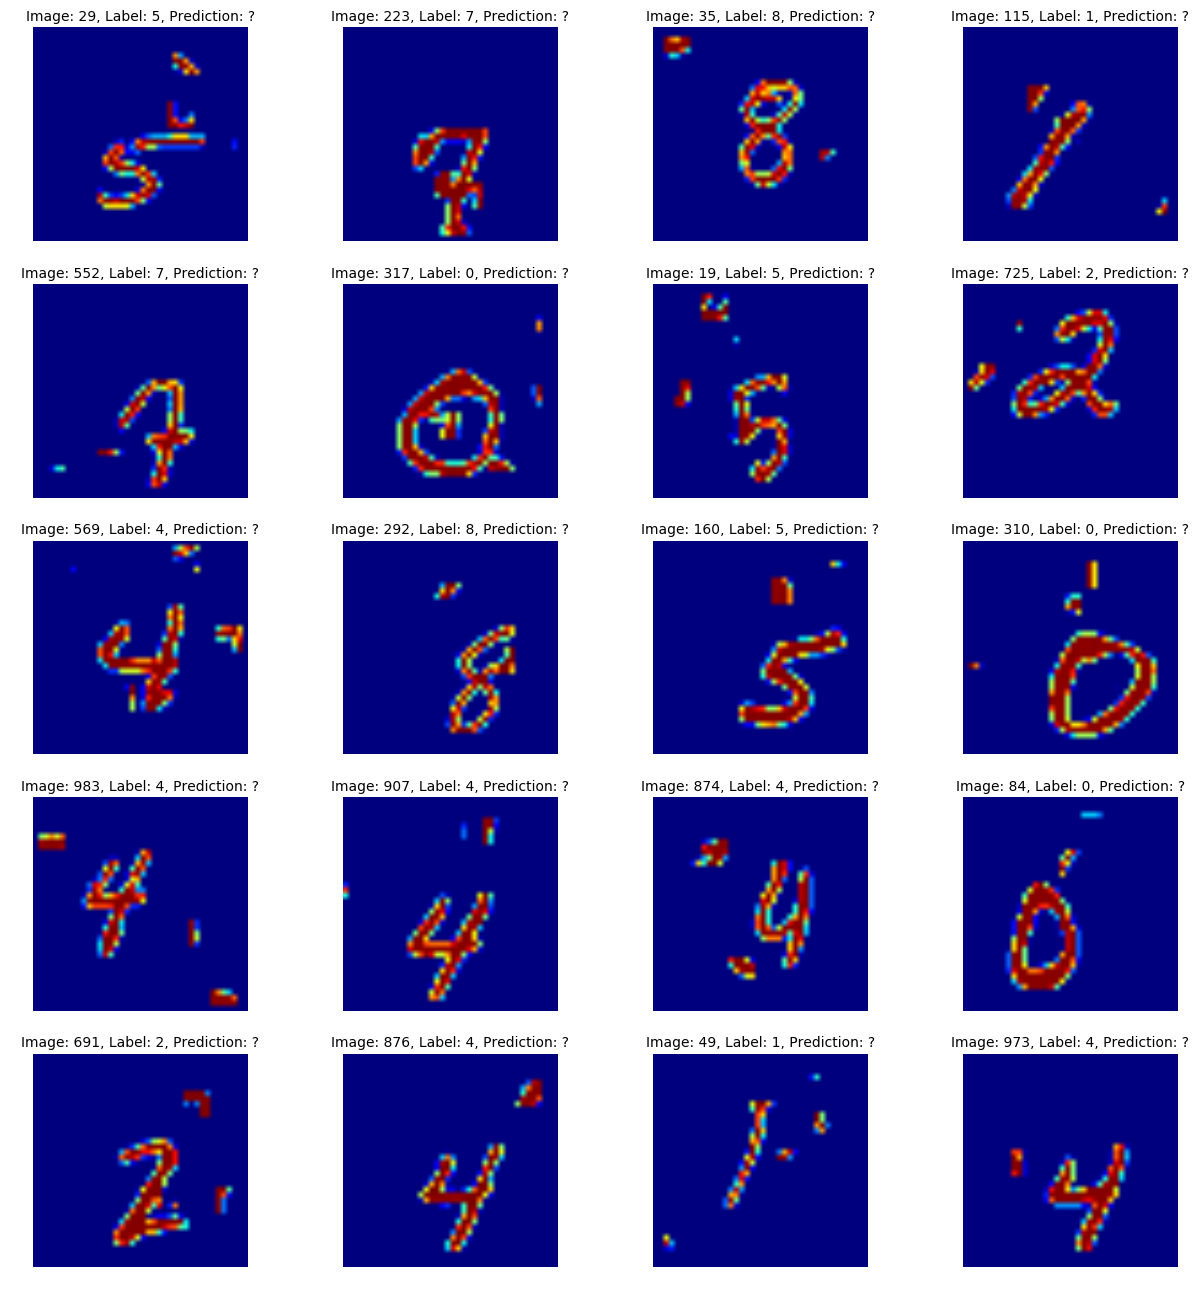

In [4]:
np.random.seed = 99
example_indices = np.random.randint(1, 1000, size=20)

ith = 0
plt.rcParams['figure.figsize'] = (16.0, 16.0)
plt.subplots_adjust(wspace=0, hspace=.2)
for index in example_indices:
    
    plt.subplot(5, 4, ith+1)
    plt.imshow(mnist_cluttered['X_test'].reshape(1000, 40, 40)[index, ...])
    
    truth = mnist_cluttered['y_test'][index][0]

    plt.title("Image: {}, Label: {}, Prediction: ?".format(index, truth), {'fontsize': 10})
    plt.axis('off')
    ith += 1

# Part 3: Localization Network

## Create placeholders

__Key idea:__

Placeholders for 40x40 resolution input images.


In [5]:
tf.set_random_seed(1)
x = tf.placeholder(tf.float32, [None, 1600])
y = tf.placeholder(tf.float32, [None, 10])

## Reshape inputs

__Key idea:__

Since x is currently [batch, height*width], we need to reshape to a
4-D tensor to use it in a convolutional graph.  If one component of
`shape` is the special value -1, the size of that dimension is
computed so that the total size remains constant.  Since we haven't
defined the batch dimension's shape yet, we use -1 to denote this
dimension should not change size.

In [6]:
x_tensor = tf.reshape(x, [-1, 40, 40, 1])

## Setup a two-layer localisation network

__Key idea:__

Setup the two-layer localisation network to figure out the parameters for an affine transformation of the input.  Use identity transformation as starting point.

In [7]:
# Identity transformation
initial = np.array([[1., 0, 0], [0, 1., 0]])
initial = initial.astype('float32')
initial = initial.flatten()

# Create variables for fully connected layer for the localisation network
W_fc_loc1 = weight_variable([1600, 20])
b_fc_loc1 = bias_variable([20])

W_fc_loc2 = weight_variable([20, 6])
b_fc_loc2 = tf.Variable(initial_value=initial, name='b_fc_loc2')

## Define a two layer localisation network

__Key idea:__

Use activation function (Tanh) for first and second local layers.  Add regularization technique (dropout) in anticipation for overfitting.

In [8]:
# Frist layer
h_fc_loc1 = tf.nn.tanh(tf.matmul(x, W_fc_loc1) + b_fc_loc1)

# Dropout for regularization
keep_prob = tf.placeholder(tf.float32)
h_fc_loc1_drop = tf.nn.dropout(h_fc_loc1, keep_prob)

# Second layer
h_fc_loc2 = tf.nn.tanh(tf.matmul(h_fc_loc1_drop, W_fc_loc2) + b_fc_loc2)

## Create a spatial transformer module

In [9]:
out_size = (40, 40)
h_trans = transformer(x_tensor, h_fc_loc2, out_size)

# Part 4: Convolutional Layers

__Key idea:__

Design a simple two layer convolutional network.

## Build the first layer of convolution

__Key idea:__

Define our stride as batch x height x width x channels instead of pooling, we use strides of 2 and more layers with smaller filters.

In [10]:
# Weight matrix is [height x width x input_channels x output_channels]
filter_size = 3
n_filters_1 = 16
W_conv1 = weight_variable([filter_size, filter_size, 1, n_filters_1])

# Bias is [output_channels]
b_conv1 = bias_variable([n_filters_1])

# Activation Function
h_conv1 = tf.nn.relu(
    tf.nn.conv2d(input=h_trans, filter=W_conv1, strides=[1, 2, 2, 1], padding='SAME') + b_conv1)

## Build the second layer of convolution

In [11]:
n_filters_2 = 16
W_conv2 = weight_variable([filter_size, filter_size, n_filters_1, n_filters_2])
b_conv2 = bias_variable([n_filters_2])
h_conv2 = tf.nn.relu(
    tf.nn.conv2d(input=h_conv1, filter=W_conv2, strides=[1, 2, 2, 1], padding='SAME') + b_conv2)

## Connect the convolutional layers with a fully-connected layer

In [12]:
# Reshape to the fully-connected layer
h_conv2_flat = tf.reshape(h_conv2, [-1, 10 * 10 * n_filters_2])

# Create the fully-connected layer
n_fc = 1024
W_fc1 = weight_variable([10 * 10 * n_filters_2, n_fc])
b_fc1 = bias_variable([n_fc])
h_fc1 = tf.nn.relu(tf.matmul(h_conv2_flat, W_fc1) + b_fc1)

# Add additional regularization
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## Add a softmax layer for predicted probabilities

In [13]:
W_fc2 = weight_variable([n_fc, 10])
b_fc2 = bias_variable([10])
y_logits = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
scores = tf.nn.softmax_cross_entropy_with_logits(logits=y_logits, labels=y)

# Part 5: Loss, Optimization, and Evalution

## Define loss and optimizer

In [14]:
# Loss
cross_entropy = tf.reduce_mean(scores)

# Optimizer
opt = tf.train.AdamOptimizer()

# Minimize
optimizer = opt.minimize(cross_entropy)

# Gradients 
grads = opt.compute_gradients(cross_entropy, [b_fc_loc2])

## Monitor accuracy

In [15]:
predictions = tf.argmax(y_logits, 1)
correct_prediction = tf.equal(tf.argmax(y_logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

results_fmt = '[{:%H:%M:%S}] EPOCH {}/{} LOSS {:.3f}, DEV: {:.3f}'

# Part 6: Create and Run Session

__Key idea:__

Standard tensorflow boilerplate code to create and run a session.

## Initialize session

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## Train parameters

In [17]:
# We'll now train in minibatches and report accuracy, loss:
iter_per_epoch = 100
n_epochs = 20 # Feel free to increase the epochs for better results
train_size = 10000

indices = np.linspace(0, 10000 - 1, iter_per_epoch)
indices = indices.astype('int')

## Train model

In [18]:
results_fmt = '[{:%H:%M:%S}] EPOCH {}, ITERATION {}/{}, LOSS {:.3f}'

for epoch_i in range(n_epochs):
    for iter_i in range(iter_per_epoch - 1):
        batch_xs = X_train[indices[iter_i]:indices[iter_i + 1]]
        batch_ys = Y_train[indices[iter_i]:indices[iter_i + 1]]

        if iter_i % 10 == 0:
            loss = sess.run(cross_entropy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.0})
            print(results_fmt.format(datetime.now(), epoch_i, iter_i, iter_per_epoch, loss))
            
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.8})
        
    val_acc = sess.run(accuracy, feed_dict={x: X_valid, y: Y_valid, keep_prob: 1.0})

    print('--------> {}/{} EPOCHS, VAL ACC: {:.3f}'.format(epoch_i + 1, n_epochs, val_acc))
    
test_acc, test_predictions = sess.run([accuracy, predictions], feed_dict={x: X_test, y: Y_test, keep_prob: 1.0})
#     theta = sess.run(h_fc_loc2, feed_dict={x: batch_xs, keep_prob: 1.0})
#     print(theta[0])

[11:16:13] EPOCH 0, ITERATION 0/100, LOSS 2.302
[11:16:14] EPOCH 0, ITERATION 10/100, LOSS 2.300
[11:16:14] EPOCH 0, ITERATION 20/100, LOSS 2.296
[11:16:15] EPOCH 0, ITERATION 30/100, LOSS 2.302
[11:16:15] EPOCH 0, ITERATION 40/100, LOSS 2.299
[11:16:16] EPOCH 0, ITERATION 50/100, LOSS 2.287
[11:16:16] EPOCH 0, ITERATION 60/100, LOSS 2.288
[11:16:17] EPOCH 0, ITERATION 70/100, LOSS 2.239
[11:16:17] EPOCH 0, ITERATION 80/100, LOSS 2.227
[11:16:18] EPOCH 0, ITERATION 90/100, LOSS 2.151
--------> 1/20 EPOCHS, VAL ACC: 0.242
[11:16:18] EPOCH 1, ITERATION 0/100, LOSS 2.079
[11:16:19] EPOCH 1, ITERATION 10/100, LOSS 2.000
[11:16:19] EPOCH 1, ITERATION 20/100, LOSS 1.845
[11:16:20] EPOCH 1, ITERATION 30/100, LOSS 1.727
[11:16:21] EPOCH 1, ITERATION 40/100, LOSS 1.548
[11:16:21] EPOCH 1, ITERATION 50/100, LOSS 1.542
[11:16:22] EPOCH 1, ITERATION 60/100, LOSS 1.416
[11:16:22] EPOCH 1, ITERATION 70/100, LOSS 1.391
[11:16:23] EPOCH 1, ITERATION 80/100, LOSS 1.331
[11:16:24] EPOCH 1, ITERATION 90/

# Part 7: Evaluate

## Accuracy

In [19]:
test_acc, test_predictions = sess.run([accuracy, predictions], feed_dict={x: X_test, y: Y_test, keep_prob: 1.0})
print(test_acc)

0.931


## Inspect results

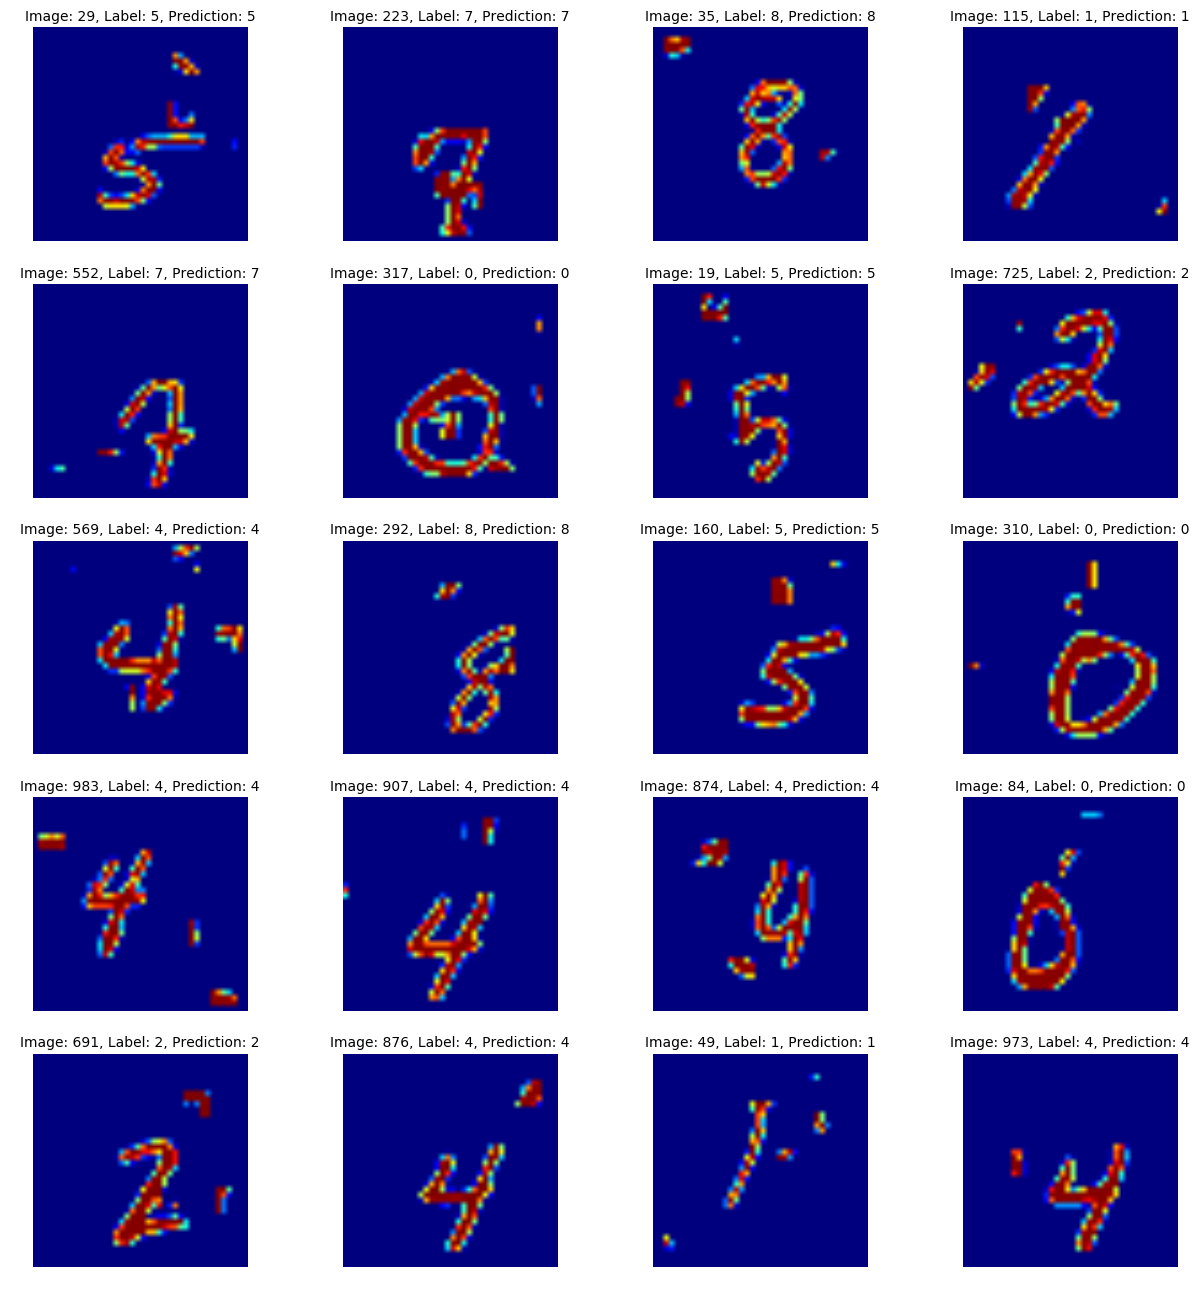

In [20]:
ith = 0
plt.rcParams['figure.figsize'] = (16.0, 16.0)
plt.subplots_adjust(wspace=0, hspace=.2)
for index in example_indices:
    
    plt.subplot(5, 4, ith+1)
    plt.imshow(mnist_cluttered['X_test'].reshape(1000, 40, 40)[index, ...])
    
    truth = mnist_cluttered['y_test'][index][0]
    pred = test_predictions[index]

    if truth == pred:
        label_color = 'black'
    else:
        label_color = 'red'

    plt.title("Image: {}, Label: {}, Prediction: {}".format(index, truth, pred), {'fontsize': 10},  color=label_color)
    plt.axis('off')
    ith += 1